Question 3: Decision Trees with Cross-Validation<br>
Task: Implement cross-validation for decision trees to find the best performing model on a
classification problem.

✅ Best Parameters: {'criterion': 'gini', 'max_depth': 4}
📈 Best CV Score: 0.9416666666666668

🔍 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

✅ Accuracy on Test Set: 1.0


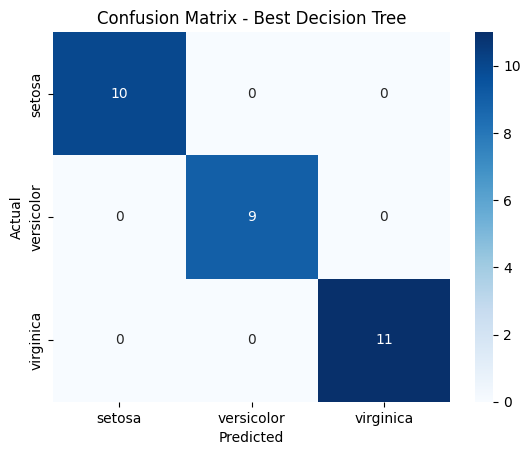

In [1]:
# 🧰 Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 📥 Load Dataset
data = load_iris()
X = data.data
y = data.target

# 🧪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔍 Define Parameter Grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'criterion': ['gini', 'entropy']
}

# 🌳 Decision Tree with Cross-Validation
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 📊 Best Model and Score
print("✅ Best Parameters:", grid_search.best_params_)
print("📈 Best CV Score:", grid_search.best_score_)

# 🧠 Evaluate on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Accuracy on Test Set:", accuracy_score(y_test, y_pred))

# 🧮 Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("Confusion Matrix - Best Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
